- https://github.com/cs109/2015lab3/blob/master/Lab3-Freq.ipynb

In [44]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import bernoulli, poisson, binom

### Exponential Distribution
Poisson process is a stochastic process which counts the number of events and the time interval between these. The time interval has an exponential distribution with parameter $\lambda$, which is the **arrival rate**.

$$f(x;\lambda) = \lambda e^{-\lambda x}, x \geq 0$$

- Mean of the interval = $\lambda$ 
- variance of interval = $\frac {1}{\lambda^2}$

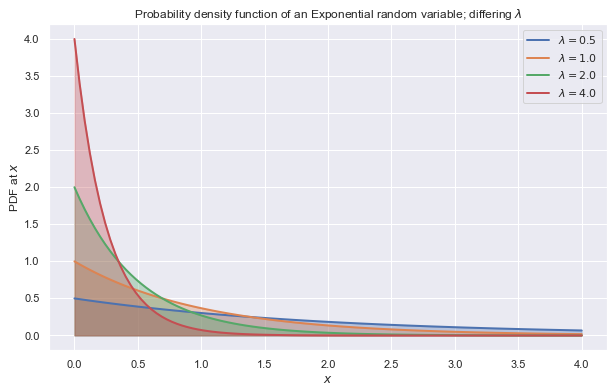

In [3]:
from scipy.stats import expon

x = np.linspace(0,4, 100)
colors=sns.color_palette()

lambda_ = [0.5, 1, 2, 4]
plt.figure(figsize=(10,6))
for l,c in zip(lambda_,colors):
    plt.plot(x, expon.pdf(x, scale=1./l), lw=2, 
                color=c, label = "$\lambda = %.1f$"%l)
    plt.fill_between(x, expon.pdf(x, scale=1./l), color=c, alpha = .33)
    
plt.legend()
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")
plt.title("Probability density function of an Exponential random variable;\
 differing $\lambda$");

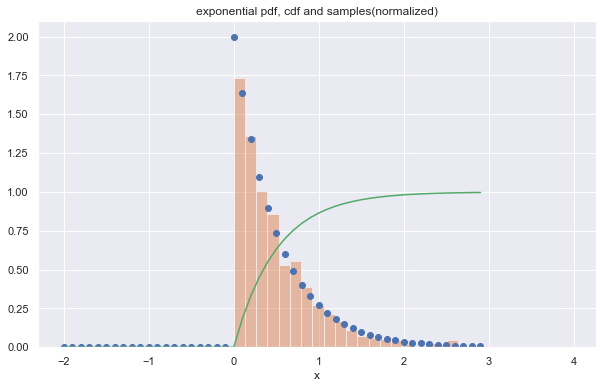

In [4]:
plt.figure(figsize=(10,6))

rv = expon(scale=0.5)

xpts=np.arange(-2,3,0.1)
plt.plot(xpts,rv.pdf(xpts),'o')
plt.hist(rv.rvs(size=1000), density=True, alpha=0.5, bins=30);
plt.plot(xpts, rv.cdf(xpts));
plt.xlabel("x")
plt.title("exponential pdf, cdf and samples(normalized)");

### Example with data

In [5]:
df = pd.read_table("./data/babyboom.dat.txt", header=None, sep='\s+', 
                   names=['24hrtime','sex','weight','minutes'])
df.head()

,24hrtime,sex,weight,minutes
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


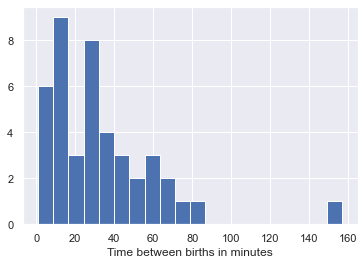

In [40]:
# get the time difference between successive births
timediffs = df.minutes.diff()[1:]
plt.hist(timediffs, bins = 20)
plt.xlabel("Time between births in minutes");

Mean of arrival rate is 0.03 babies per minute or ~ 2 babies/hr

In [32]:
lambdas = 1/timediffs.mean()

print("Lambda or arrival rate:", lambdas)
print("No. babies per hour   :", 1/lambdas)

Lambda or arrival rate: 0.03006993006993007
No. babies per hour   : 33.25581395348837


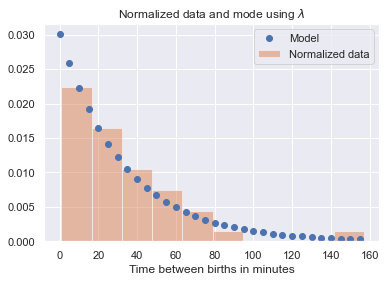

In [41]:
minutes = np.arange(0,160,5)
rv = expon(scale = 1/lambdas)
plt.plot(minutes, rv.pdf(minutes), 'o', label = "Model")

plt.hist(timediffs, bins = 10, density = True, alpha = 0.5, label = "Normalized data")

plt.xlabel("Time between births in minutes")
plt.title("Normalized data and mode using $\lambda$")
plt.legend();

###  Poisson Distribution
Distribution of number of events that occur where there are a large number of independent rare events. Distribution is:

$$P(Z=k) = \frac{\lambda e^{-\lambda}} {k!}, k = 0,1,2,...$$

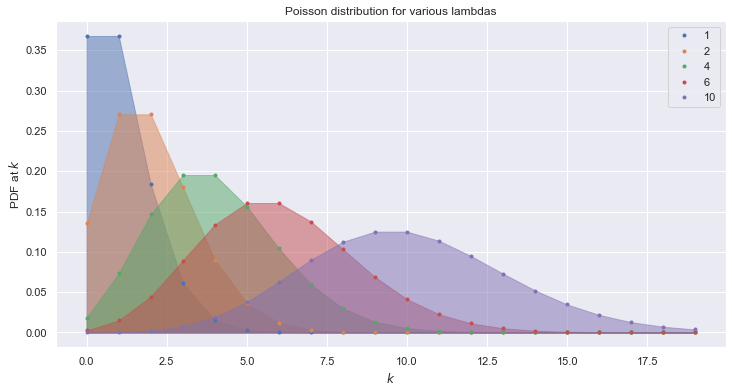

In [45]:
plt.figure(figsize = (12,6))
k = np.arange(0,20)

for i, lambdas in enumerate([1, 2, 4, 6, 10]):
    plt.plot(k, poisson.pmf(k, lambdas), '.', lw=2, color = colors[i], label = lambdas)
    plt.fill_between(k, poisson.pmf(k, lambdas), color = colors[i], alpha=0.5)

plt.title("Poisson distribution for various lambdas")
plt.ylabel("PDF at $k$")
plt.xlabel("$k$")
    
plt.legend();